In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.xception import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Xception/BaruXception.keras')


In [ ]:

# Tampilkan ringkasan model untuk melihat layer-layarnya
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 20,886,070 (79.67 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 16,394 (64.04 KB)

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer True
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 Fa

In [ ]:

# Aktifkan fine-tune untuk blok 14 (ayer 126–134)
for layer in model.layers[126:135]:
    layer.trainable = True

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer True
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 Fa

In [ ]:
# Path ke dataset di Google Drive
train_dir = '/content/drive/MyDrive/Skindata/train'
valid_dir = '/content/drive/MyDrive/Skindata/val'
test_dir = '/content/drive/MyDrive/Skindata/test'

In [ ]:
# Parameter preprocessing
img_size = (224, 224)
batch_size = 32

In [ ]:
# Data augmentation dan preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
# Mengecek jumlah kelas
num_classes = len(train_generator.class_indices)
print("Class indices:", train_generator.class_indices)
print("Jumlah kelas:", num_classes)

Found 652 images belonging to 4 classes.
Found 140 images belonging to 4 classes.
Found 140 images belonging to 4 classes.
Class indices: {'eksim': 0, 'herpes': 1, 'melanoma': 2, 'normal': 3}
Jumlah kelas: 4


In [ ]:
from tensorflow.keras.optimizers import Adam
#compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
# Inisialisasi early stopping jika diperlukan
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Melatih model dengan menggunakan data generator
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    epochs=30,  # Tentukan jumlah epoch sesuai kebutuhan
    callbacks=[early_stop]  # Early stopping untuk menghentikan training jika val_loss tidak membaik
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 269s 12s/step - accuracy: 0.8550 - loss: 0.4772 - val_accuracy: 0.9071 - val_loss: 0.2556
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 72s 657ms/step - accuracy: 0.8327 - loss: 0.4622 - val_accuracy: 0.9143 - val_loss: 0.2534
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 646ms/step - accuracy: 0.8512 - loss: 0.4210 - val_accuracy: 0.9071 - val_loss: 0.2540
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 655ms/step - accuracy: 0.8683 - loss: 0.3796 - val_accuracy: 0.9143 - val_loss: 0.2530
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 708ms/step - accuracy: 0.8736 - loss: 0.3600 - val_accuracy: 0.9214 - val_loss: 0.2489
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 660ms/step - accuracy: 0.8780 - loss: 0.3622 - val_accuracy: 0.9143 - val_loss: 0.2414
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 670ms/step - accuracy: 0.9061 - loss: 0.3238 - val_accuracy: 0.9214 - val_loss: 0.2354
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 665ms/step - accuracy: 0.9144 - loss: 0.2832 - val_accur

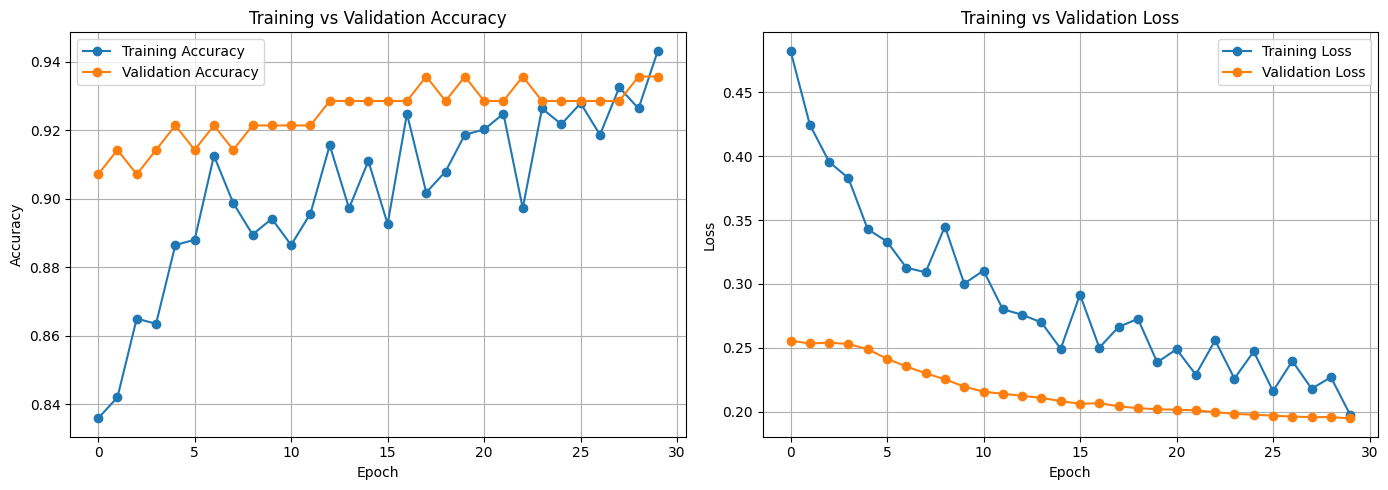

In [ ]:
import matplotlib.pyplot as plt

# Ambil nilai dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Buat 2 plot: akurasi & loss
plt.figure(figsize=(14, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

# Evaluasi model menggunakan data validasi atau data uji
test_loss, test_accuracy = model.evaluate(valid_generator, steps=len(valid_generator))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.9087 - loss: 0.2122
Test Loss: 0.194766566157341
Test Accuracy: 0.9357143044471741
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.9087 - loss: 0.2122
Validation Loss: 0.1948
Validation Accuracy: 0.9357


5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 8s/step


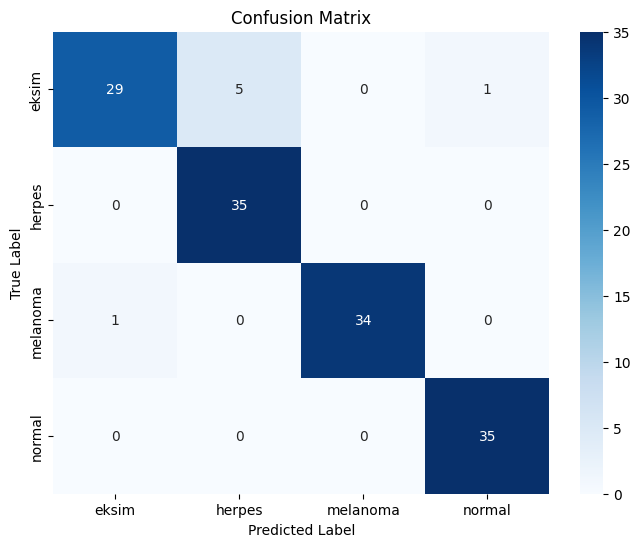

Classification Report:
              precision    recall  f1-score   support

       eksim       0.97      0.83      0.89        35
      herpes       0.88      1.00      0.93        35
    melanoma       1.00      0.97      0.99        35
      normal       0.97      1.00      0.99        35

    accuracy                           0.95       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

#confusion matrix
# 1. Prediksi kelas untuk data test
y_pred_prob = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(y_pred_prob, axis=1)

# 2. Label sebenarnya dari test_generator (karena shuffle=False)
y_true = test_generator.classes

# 3. Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Label kelas (dari generator)
class_names = list(test_generator.class_indices.keys())

# 5. Plot confusion matrix dengan seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Precision, Recall, F1-score)
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


## fine tuning lanjutan 3 blok

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer True
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 Fa

In [ ]:
# Aktifkan fine-tune untuk blok 12-14 (biasanya layer 106–134)
for layer in model.layers:
    layer.trainable = False
for layer in model.layers[106:135]:
    layer.trainable = True

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 F

In [ ]:
# Path ke dataset di Google Drive
train_dir = '/content/drive/MyDrive/Skindata_experimen/train'
valid_dir = '/content/drive/MyDrive/Skindata_experimen/val'
test_dir = '/content/drive/MyDrive/Skindata_experimen/test'

In [ ]:
# Parameter preprocessing
img_size = (224, 224)
batch_size = 32

In [ ]:
# Data augmentation dan preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
# Mengecek jumlah kelas
num_classes = len(train_generator.class_indices)
print("Class indices:", train_generator.class_indices)
print("Jumlah kelas:", num_classes)

Found 1956 images belonging to 4 classes.
Found 140 images belonging to 4 classes.
Found 140 images belonging to 4 classes.
Class indices: {'eksim': 0, 'herpes': 1, 'melanoma': 2, 'normal': 3}
Jumlah kelas: 4


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Ambil semua label training langsung dari generator
labels = train_generator.classes

# Hitung class weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)


Class weights: {0: 0.6, 1: 0.6, 2: 3.0, 3: 3.0}


In [ ]:
from tensorflow.keras.optimizers import Adam
#compile model
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Inisialisasi early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3,min_lr=1e-7)

# Melatih model dengan menggunakan data generator
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    epochs=50,  # Tentukan jumlah epoch sesuai kebutuhan
    class_weight=class_weight_dict,
    callbacks=[early_stop, lr_scheduler]  # Early stopping untuk menghentikan training jika val_loss tidak membaik

)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 61s 756ms/step - accuracy: 0.3648 - loss: 1.4331 - val_accuracy: 0.5071 - val_loss: 1.1660 - learning_rate: 1.0000e-05
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 66s 588ms/step - accuracy: 0.5519 - loss: 1.1733 - val_accuracy: 0.7786 - val_loss: 0.8453 - learning_rate: 1.0000e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 572ms/step - accuracy: 0.6869 - loss: 0.8573 - val_accuracy: 0.8571 - val_loss: 0.5776 - learning_rate: 1.0000e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 42s 590ms/step - accuracy: 0.6821 - loss: 0.7055 - val_accuracy: 0.8786 - val_loss: 0.4676 - learning_rate: 1.0000e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 596ms/step - accuracy: 0.7249 - loss: 0.6179 - val_accuracy: 0.8786 - val_loss: 0.4104 - learning_rate: 1.0000e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 587ms/step - accuracy: 0.7726 - loss: 0.5354 - val_accuracy: 0.8929 - val_loss: 0.3833 - learning_rate: 1.0000e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 583ms/step - acc

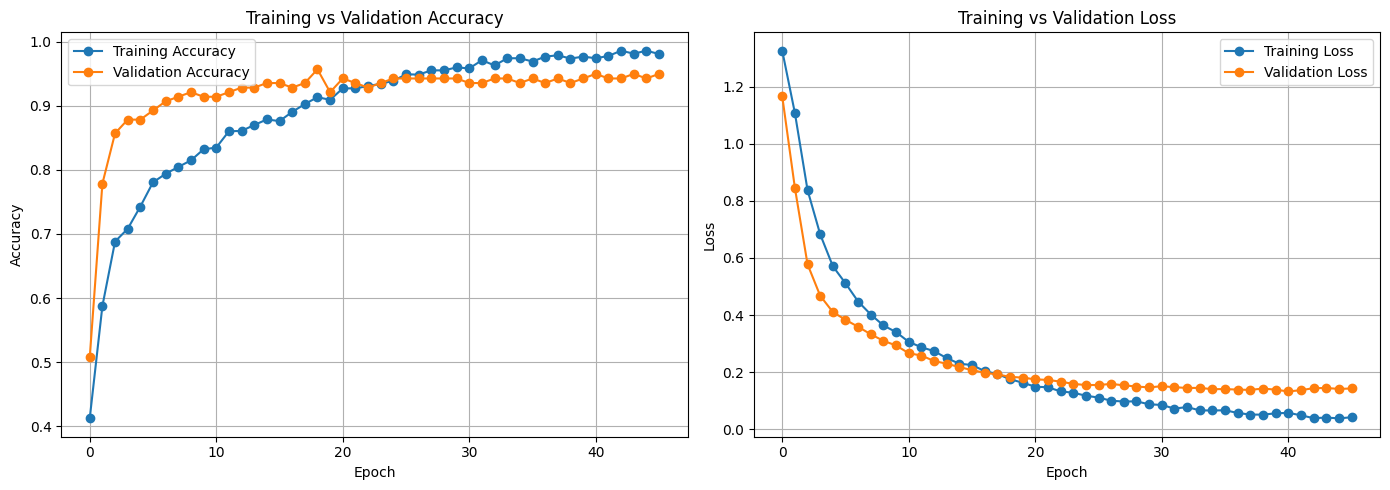

In [ ]:
import matplotlib.pyplot as plt

# Ambil nilai dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Buat 2 plot: akurasi & loss
plt.figure(figsize=(14, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

# Evaluasi model menggunakan data validasi atau data uji
test_loss, test_accuracy = model.evaluate(valid_generator, steps=len(valid_generator))
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 244s 47s/step - accuracy: 0.9681 - loss: 0.1060
Test Loss: 0.09478425979614258
Test Accuracy: 0.9785714149475098
5/5 ━━━━━━━━━━━━━━━━━━━━ 240s 46s/step - accuracy: 0.9681 - loss: 0.1060
Validation Loss: 0.0948
Validation Accuracy: 0.9786


5/5 ━━━━━━━━━━━━━━━━━━━━ 246s 46s/step


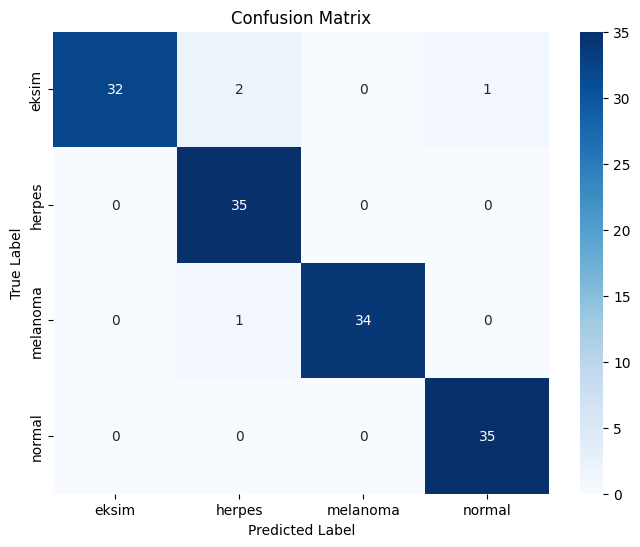

Classification Report:
              precision    recall  f1-score   support

       eksim       1.00      0.91      0.96        35
      herpes       0.92      1.00      0.96        35
    melanoma       1.00      0.97      0.99        35
      normal       0.97      1.00      0.99        35

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

#confusion matrix
# 1. Prediksi kelas untuk data test
y_pred_prob = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(y_pred_prob, axis=1)

# 2. Label sebenarnya dari test_generator (karena shuffle=False)
y_true = test_generator.classes

# 3. Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Label kelas (dari generator)
class_names = list(test_generator.class_indices.keys())

# 5. Plot confusion matrix dengan seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Precision, Recall, F1-score)
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


In [ ]:
# Menyimpan model ke file
model.save('xceptionlast.keras')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Salin file model ke Google Drive
!cp xceptionakhir.keras /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
